#Data Preprocessing Steps#



1. Typecasting
2. Handling Duplicates
3. Outlier Analysis/treatment
4. Zero & Near Zero variance Features
5. Discretization/ Binning / grouping
6. Missing Values
7. Dummy variable Creation
8. Transformation
9. Standardization/Normalization
10. String Manipulation

SEE MINDMAP :- [link text](https://360digitmg.com/mindmap-data-science)

#Importing Datsets#

In [1]:
import pandas as pd

data = pd.read_csv("ethnic diversity.csv")
data.dtypes

Employee_Name        object
EmpID                 int64
Position             object
State                object
Zip                   int64
Sex                  object
MaritalDesc          object
CitizenDesc          object
EmploymentStatus     object
Department           object
Salaries            float64
age                   int64
Race                 object
dtype: object

In [2]:
help(data.astype)

Help on method astype in module pandas.core.generic:

astype(dtype, copy: 'bool_t' = True, errors: 'str' = 'raise') -> 'FrameOrSeries' method of pandas.core.frame.DataFrame instance
    Cast a pandas object to a specified dtype ``dtype``.
    
    Parameters
    ----------
    dtype : data type, or dict of column name -> data type
        Use a numpy.dtype or Python type to cast entire pandas object to
        the same type. Alternatively, use {col: dtype, ...}, where col is a
        column label and dtype is a numpy.dtype or Python type to cast one
        or more of the DataFrame's columns to column-specific types.
    copy : bool, default True
        Return a copy when ``copy=True`` (be very careful setting
        ``copy=False`` as changes to values then may propagate to other
        pandas objects).
    errors : {'raise', 'ignore'}, default 'raise'
        Control raising of exceptions on invalid data for provided dtype.
    
        - ``raise`` : allow exceptions to be raised


In [3]:
data.head()

,Employee_Name,EmpID,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race
0,"Brown, Mia",1103024456,Accountant I,MA,1450,F,Married,US Citizen,Active,Admin Offices,674.28,28,Black or African American
1,"LaRotonda, William",1106026572,Accountant I,MA,1460,M,Divorced,US Citizen,Active,Admin Offices,674.28,50,Black or African American
2,"Steans, Tyrone",1302053333,Accountant I,MA,2703,M,Single,US Citizen,Active,Admin Offices,674.28,43,White
3,"Howard, Estelle",1211050782,Administrative Assistant,MA,2170,F,Married,US Citizen,Terminated for Cause,Admin Offices,47822.00,44,White
4,"Singh, Nan",1307059817,Administrative Assistant,MA,2330,F,Single,US Citizen,Active,Admin Offices,61089.35,33,White


#Type Casting#

.astype() function is used

In [4]:
# Convert 'float64' into 'int64' type. 
data.Salaries = data.Salaries.astype('int64')
data.dtypes

Employee_Name       object
EmpID                int64
Position            object
State               object
Zip                  int64
Sex                 object
MaritalDesc         object
CitizenDesc         object
EmploymentStatus    object
Department          object
Salaries             int64
age                  int64
Race                object
dtype: object

In [5]:
data.age = data.age.astype('float32')
data.dtypes

Employee_Name        object
EmpID                 int64
Position             object
State                object
Zip                   int64
Sex                  object
MaritalDesc          object
CitizenDesc          object
EmploymentStatus     object
Department           object
Salaries              int64
age                 float32
Race                 object
dtype: object

#Handling Duplicateds#

##Identify the duplicates records in thr Data##

1. variable_name.duplicated() :- for identifying duplicates 
2. variable_name.drop_duplicates() :- for deleting the duplicates

In [6]:
data = pd.read_csv("mtcars_dup.csv")
duplicate = data.duplicated()
duplicate

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23     True
24    False
25    False
26    False
27     True
28    False
29    False
30    False
31    False
dtype: bool

There are three duplicates in this record

In [7]:
sum(duplicate)

3

##Removing the duplicates##

Here, After removing the duplicates, the remaining data is assighned to to new variable

In [8]:
data1 = data.drop_duplicates()

In [9]:
data.info() #old data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


There were 32 rows oyof which 3 were duplicates those are removed and remaining data is assigned to data1 i.e. 29 rows

In [10]:
data1.info() #new dataSet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     29 non-null     float64
 1   cyl     29 non-null     int64  
 2   disp    29 non-null     float64
 3   hp      29 non-null     int64  
 4   drat    29 non-null     float64
 5   wt      29 non-null     float64
 6   qsec    29 non-null     float64
 7   vs      29 non-null     int64  
 8   am      29 non-null     int64  
 9   gear    29 non-null     int64  
 10  carb    29 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.7 KB


#Outlier Analysis/Treatment#

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

#data integrated with file is being loaded in 'df'
df = pd.read_csv("ethnic diversity.csv")
df.dtypes

Employee_Name        object
EmpID                 int64
Position             object
State                object
Zip                   int64
Sex                  object
MaritalDesc          object
CitizenDesc          object
EmploymentStatus     object
Department           object
Salaries            float64
age                   int64
Race                 object
dtype: object

##Finding Outliers in Salaries (Boxplot)##

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


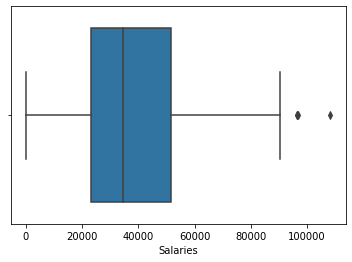

In [12]:
sns.boxplot(df.Salaries)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


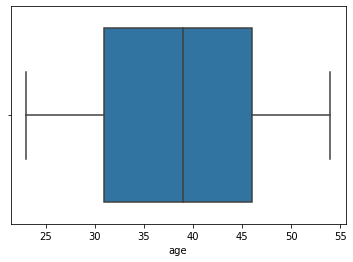

In [13]:
sns.boxplot(df.age)

There are no outliers

##Detection Of Outliers##

1. IQR(Q2) = Q3 - Q1
2. upper_limit = Q3 + (IQR * 1.5)
3. lower_limit = Q1 - (IQR * 1.5)
4. Q3 = df['Salaries'].quantile(0.75)
5. Q1 = df['Salaries'].quantile(0.25)


Below 0.75 and 0.25 in the boxplot sholud be imagined or taken from bottom to up of the box plot

In [14]:
# Detection of outliers (find limits for salary based on IQR)
IQR = df['Salaries'].quantile(0.75) - df['Salaries'].quantile(0.25)
#IQR = Q3 - Q1
upper_limit = df['Salaries'].quantile(0.75) + (IQR * 1.5)
#upper_limit = Q3 + (IQR * 1.5)
lower_limit = df['Salaries'].quantile(0.25) - (IQR * 1.5)
#lower_limit = Q1 - (IQR * 1.5)

Q3 = df['Salaries'].quantile(0.75)
Q1 = df['Salaries'].quantile(0.25)


In [15]:
IQR

28359.945

In [16]:
lower_limit

-19446.9675

In [17]:
upper_limit

93992.8125

In [18]:
Q3

51452.895

In [19]:
Q1

23092.949999999997

##Training Datasets##

###1. Remove###

In [20]:
# Trimming Technique
# Let's flag the outliers in the data set

# By using numpy, the values of df.Salaries where ever thay are greater than upper_limit
# those will be assigned to 'TRUE' and the values of df.Salaries where ever thay are lower than lower_limit
# those will be assigned to 'TRUE' other wise It is assigned to 'False'
# TRUE means, it is outlier and False means it is not outlier
 
outliers_df = np.where(df['Salaries'] > upper_limit, True, np.where(df['Salaries'] < lower_limit, True, False))
outliers_df

#outliers are stored in the outlier_df and yhis variable only stores the TRUE values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

There are four outliers, which are true

Now, here the location of the outliers is taken with help of the loc and outliers_df. Now with help of '~' this means tilda(which is like negation), it says that those who are not outliers in all columns and these locations is stored in the df_trimmed



In [21]:
df_trimmed = df.loc[~(outliers_df), ]
df_trimmed.head()

,Employee_Name,EmpID,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race
0,"Brown, Mia",1103024456,Accountant I,MA,1450,F,Married,US Citizen,Active,Admin Offices,674.28,28,Black or African American
1,"LaRotonda, William",1106026572,Accountant I,MA,1460,M,Divorced,US Citizen,Active,Admin Offices,674.28,50,Black or African American
2,"Steans, Tyrone",1302053333,Accountant I,MA,2703,M,Single,US Citizen,Active,Admin Offices,674.28,43,White
3,"Howard, Estelle",1211050782,Administrative Assistant,MA,2170,F,Married,US Citizen,Terminated for Cause,Admin Offices,47822.00,44,White
4,"Singh, Nan",1307059817,Administrative Assistant,MA,2330,F,Single,US Citizen,Active,Admin Offices,61089.35,33,White


Here '~' is removed this means, the outlier TRUE values will be stored in the df_trimmed and then only outliers will be printed

In [22]:
df_trimmed_2 = df.loc[(outliers_df), ]
df_trimmed_2.head()
#These are the outliers

,Employee_Name,EmpID,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race
23,"Givens, Myriam",1203032099,Area Sales Manager,IN,46204,F,Single,US Citizen,Active,Sales,96708.02,37,White
63,"Soto, Julia",1203032263,IT Support,MA,2360,F,Married,US Citizen,Active,IT/IS,96573.02,52,Black or African American
74,"Albert, Michael",1501072311,Production Manager,MA,2169,M,Divorced,US Citizen,Active,Production,96299.04,46,White
216,"Kinsella, Kathleen",710007401,Production Technician I,MA,2170,F,Married,US Citizen,Voluntarily Terminated,Production,108304.00,27,White


In [23]:
df.shape, df_trimmed.shape

((310, 13), (306, 13))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


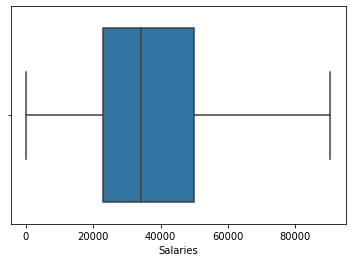

In [24]:
# Let's explore outliers in the trimmed dataset
sns.boxplot(df_trimmed.Salaries)
# We see no outliers

###2. Replace###

Here, 'df_replaced' named new column is created and and values greater than upper limit are eplavced with upper limit value and same for lower limit

Syntax :- 
variable_name or (where you want to assign) = pd.Dataframe(np.where(df['Variable1] _condition_, (if condition full filled then what to do), np.where(df['Variable2'] _condition_ (if condition full filled then what to do), (if both both conditions are not satisfied then what to do)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


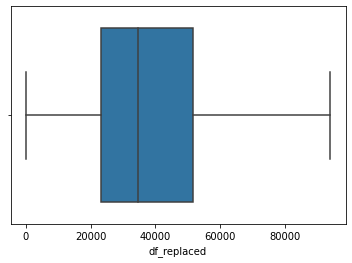

In [25]:
# Replace the outliers by the maximum and minimum limit
df['df_replaced'] = pd.DataFrame(np.where(df['Salaries'] > upper_limit, upper_limit, np.where(df['Salaries'] < lower_limit, lower_limit, df['Salaries'])))
#plotting is doneof new column 'df_replaced'
sns.boxplot(df.df_replaced)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Employee_Name     310 non-null    object 
 1   EmpID             310 non-null    int64  
 2   Position          310 non-null    object 
 3   State             310 non-null    object 
 4   Zip               310 non-null    int64  
 5   Sex               310 non-null    object 
 6   MaritalDesc       310 non-null    object 
 7   CitizenDesc       310 non-null    object 
 8   EmploymentStatus  310 non-null    object 
 9   Department        310 non-null    object 
 10  Salaries          310 non-null    float64
 11  age               310 non-null    int64  
 12  Race              310 non-null    object 
 13  df_replaced       310 non-null    float64
dtypes: float64(2), int64(3), object(9)
memory usage: 34.0+ KB


###3. Winsorization###

In [27]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 8.7 MB/s 


In [28]:
# pip install feature_engine   # install the package
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Salaries'])

In [29]:
df_t = winsor.fit_transform(df[['Salaries']])

# Inspect the minimum caps and maximum caps 
# winsor.left_tail_caps_, winsor.right_tail_caps_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


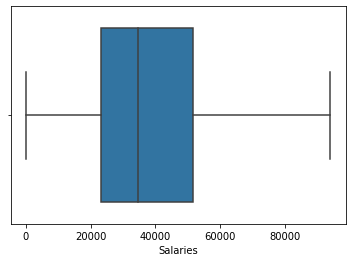

In [30]:
# Let's see boxplot
sns.boxplot(df_t.Salaries)

#Zero Variance & Near Zero Variance#

If the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the model. In that case, it should be removed. 

In [31]:
df.var() # variance of numeric variables
df.var() == 0
df.var(axis=0) == 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


EmpID          False
Zip            False
Salaries       False
age            False
df_replaced    False
dtype: bool

#Missing Values :- Imputation#

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Use the modified ethnic dataset
df = pd.read_csv('modified ethnic.csv') # for doing modifications

# Check for count of NA's in each column
df.isna().sum()

# Create an imputer object that fills 'Nan' values
# Mean and Median imputer are used for numeric data (Salaries)
# Mode is used for discrete data (ex: Position, Sex, MaritalDesc

Position            43
State               35
Sex                 34
MaritalDesc         29
CitizenDesc         27
EmploymentStatus    32
Department          18
Salaries            32
age                 35
Race                25
dtype: int64

There can be atleast 43 missingness in rows and maximum missingness in columns can be 310

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


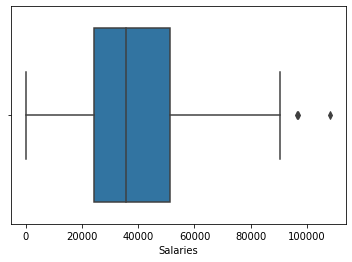

In [33]:
# For Mean, Median, Mode imputation we can use Simple Imputer or df.fillna()
from sklearn.impute import SimpleImputer
sns.boxplot(df.Salaries)

There is missingness in the salary column then, in this case matplotlib does not work. So we have to use seaborn as sns

##Median Imputer##

In [34]:
median_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df["Salaries"] = pd.DataFrame(median_imputer.fit_transform(df[["Salaries"]]))
df["Salaries"].isna().sum()

0

##Mean Imputer##

In [35]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df["age"] = pd.DataFrame(mean_imputer.fit_transform(df[["age"]]))
df["age"].isna().sum()  # all 2 records replaced by median 

df.isna().sum()

Position            43
State               35
Sex                 34
MaritalDesc         29
CitizenDesc         27
EmploymentStatus    32
Department          18
Salaries             0
age                  0
Race                25
dtype: int64

##Mode Imputer##

In [36]:
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df["Sex"] = pd.DataFrame(mode_imputer.fit_transform(df[["Sex"]]))
df["MaritalDesc"] = pd.DataFrame(mode_imputer.fit_transform(df[["MaritalDesc"]]))
df.isnull().sum()  # all Sex, MaritalDesc records replaced by mode

Position            43
State               35
Sex                  0
MaritalDesc          0
CitizenDesc         27
EmploymentStatus    32
Department          18
Salaries             0
age                  0
Race                25
dtype: int64

Doing same thing for Position

In [37]:
df["Position"] = pd.DataFrame(mode_imputer.fit_transform(df[["Position"]]))

In [39]:
df.isnull().sum()  # all Sex, MaritalDesc records replaced by mode

Position             0
State               35
Sex                  0
MaritalDesc          0
CitizenDesc         27
EmploymentStatus    32
Department          18
Salaries             0
age                  0
Race                25
dtype: int64

Here, Missingness for Positin is became 0

#Discreation/Binning/Grouping#

In [40]:
import pandas as pd
data = pd.read_csv("ethnic diversity.csv")
data.head()

,Employee_Name,EmpID,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race
0,"Brown, Mia",1103024456,Accountant I,MA,1450,F,Married,US Citizen,Active,Admin Offices,674.28,28,Black or African American
1,"LaRotonda, William",1106026572,Accountant I,MA,1460,M,Divorced,US Citizen,Active,Admin Offices,674.28,50,Black or African American
2,"Steans, Tyrone",1302053333,Accountant I,MA,2703,M,Single,US Citizen,Active,Admin Offices,674.28,43,White
3,"Howard, Estelle",1211050782,Administrative Assistant,MA,2170,F,Married,US Citizen,Terminated for Cause,Admin Offices,47822.00,44,White
4,"Singh, Nan",1307059817,Administrative Assistant,MA,2330,F,Single,US Citizen,Active,Admin Offices,61089.35,33,White


In [41]:
data.describe()

,EmpID,Zip,Salaries,age
count,3.100000e+02,310.000000,310.000000,310.000000
mean,1.199745e+09,6569.732258,36670.102742,38.696774
std,1.829600e+08,16933.864054,21075.942369,9.258163
min,6.020003e+08,1013.000000,0.000000,23.000000
25%,1.101024e+09,1901.250000,23092.950000,31.000000
50%,1.203032e+09,2132.000000,34554.745000,39.000000
75%,1.378814e+09,2357.000000,51452.895000,46.000000
max,1.988300e+09,98052.000000,108304.000000,54.000000


Here, the data is devided into two bins, from minimum to mean and from mean to maximum

In [42]:
data['Salaries_new'] = pd.cut(data['Salaries'], bins = [min(data.Salaries), 
                                                  data.Salaries.mean(), max(data.Salaries)], labels=["Low", "High"])
data.head(10)

,Employee_Name,EmpID,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race,Salaries_new
0,"Brown, Mia",1103024456,Accountant I,MA,1450,F,Married,US Citizen,Active,Admin Offices,674.28,28,Black or African American,Low
1,"LaRotonda, William",1106026572,Accountant I,MA,1460,M,Divorced,US Citizen,Active,Admin Offices,674.28,50,Black or African American,Low
2,"Steans, Tyrone",1302053333,Accountant I,MA,2703,M,Single,US Citizen,Active,Admin Offices,674.28,43,White,Low
3,"Howard, Estelle",1211050782,Administrative Assistant,MA,2170,F,Married,US Citizen,Terminated for Cause,Admin Offices,47822.00,44,White,High
4,"Singh, Nan",1307059817,Administrative Assistant,MA,2330,F,Single,US Citizen,Active,Admin Offices,61089.35,33,White,High
5,"Smith, Leigh Ann",711007713,Administrative Assistant,MA,1844,F,Married,US Citizen,Voluntarily Terminated,Admin Offices,32406.02,40,Asian,Low
6,"Bunbury, Jessica",1504073368,Area Sales Manager,VA,21851,F,Married,Eligible NonCitizen,Voluntarily Terminated,Sales,62051.64,26,Black or African American,High
7,"Carter, Michelle",1403065721,Area Sales Manager,VT,5664,F,Single,US Citizen,Active,Sales,55912.50,25,White,High
8,"Dietrich, Jenna",1408069481,Area Sales Manager,WA,98052,F,Single,US Citizen,Active,Sales,15684.19,35,White,Low
9,"Digitale, Alfred",1306059197,Area Sales Manager,NH,3062,M,Married,US Citizen,Active,Sales,33773.70,45,American Indian or Alaska Native,Low


In [44]:
data.Salaries_new.value_counts()

Low     166
High    143
Name: Salaries_new, dtype: int64

In [45]:
data.MaritalDesc.value_counts()

Single       137
Married      123
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

In [46]:
data['Salaries_new_new'] = pd.cut(data['Salaries'], bins = [min(data.Salaries), data['Salaries'].quantile(0.25), 
                                                  data['Salaries'].quantile(0.5), data['Salaries'].quantile(0.75), max(data.Salaries)], labels=["Low","Below Ave", "Above Ave", "High"])

In [47]:
data.Salaries_new_new.value_counts()

High         78
Low          77
Below Ave    77
Above Ave    77
Name: Salaries_new_new, dtype: int64

#Dummy Variables#

For only catagorical variables or data ,dummy variables are used 

In [48]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

In [49]:
# Use the ethinc diversity dataset
df = pd.read_csv("ethnic diversity.csv")

In [51]:
df.columns # column names

Index(['Employee_Name', 'EmpID', 'Position', 'State', 'Zip', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'EmploymentStatus', 'Department',
       'Salaries', 'age', 'Race'],
      dtype='object')

In [52]:
df.shape # will give u shape of the dataframe

(310, 13)

1. When ever the variance is zero means the data is same from the column, means there is no change, then this data is not useful to us, so that column should be droped.



2. Drop means deleting and axis = 1 means column and inplace = True means is assures that indexes are properly reassigned

In [54]:
# Drop emp_name column
df.drop(['Employee_Name', 'EmpID', 'Zip'], axis = 1, inplace = True)
df.dtypes

Position             object
State                object
Sex                  object
MaritalDesc          object
CitizenDesc          object
EmploymentStatus     object
Department           object
Salaries            float64
age                   int64
Race                 object
dtype: object

In [53]:
# Create dummy variables
df_new = pd.get_dummies(df)
df_new_1 = pd.get_dummies(df, drop_first = True)
# Created dummies for all categorical columns

##One hot encoding##

In [56]:
df.columns

Index(['Salaries', 'age', 'Position', 'State', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'EmploymentStatus', 'Department', 'Race'],
      dtype='object')

Order of columns is being changed

In [57]:
df = df[['Salaries', 'age', 'Position', 'State', 'Sex',
         'MaritalDesc', 'CitizenDesc', 'EmploymentStatus', 'Department', 'Race']]

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
# Creating instance of One-Hot Encoder
enc = OneHotEncoder() # initializing method

enc_df = pd.DataFrame(enc.fit_transform(df.iloc[:, 2:]).toarray())

In [61]:
enc_df.shape

(310, 87)

##Label Encoder##

In [62]:
from sklearn.preprocessing import LabelEncoder

# Creating instance of labelencoder
labelencoder = LabelEncoder()

In [63]:
# Data Split into Input and Output variables
X = df.iloc[:,:]

In [64]:
X['Sex'] = labelencoder.fit_transform(X['Sex'])

In [65]:
X['MaritalDesc'] = labelencoder.fit_transform(X['MaritalDesc'])

In [66]:
X['CitizenDesc'] = labelencoder.fit_transform(X['CitizenDesc'])

#Normal Quantile-Qunatile Plot#

In [68]:
import pandas as pd

# Read data into Python
education = pd.read_csv("education.csv")

In [69]:
import scipy.stats as stats
import pylab

((array([-3.12260341, -2.85151707, -2.69984322, -2.59267337, -2.50893963,
         -2.43979696, -2.38066073, -2.32883665, -2.28260202, -2.24078627,
         -2.20255648, -2.16729818, -2.13454461, -2.1039326 , -2.07517382,
         -2.04803542, -2.02232653, -1.99788867, -1.97458879, -1.95231403,
         -1.93096781, -1.91046682, -1.89073868, -1.8717201 , -1.85335538,
         -1.83559526, -1.81839593, -1.80171828, -1.78552721, -1.76979112,
         -1.75448146, -1.73957231, -1.7250401 , -1.71086332, -1.69702228,
         -1.68349892, -1.6702766 , -1.65734002, -1.644675  , -1.63226842,
         -1.62010812, -1.60818277, -1.59648185, -1.5849955 , -1.57371454,
         -1.56263038, -1.55173494, -1.54102065, -1.5304804 , -1.52010749,
         -1.50989561, -1.4998388 , -1.48993143, -1.48016819, -1.47054404,
         -1.4610542 , -1.45169414, -1.44245956, -1.43334639, -1.42435072,
         -1.41546885, -1.40669727, -1.39803261, -1.38947165, -1.38101133,
         -1.37264872, -1.36438101, -1.

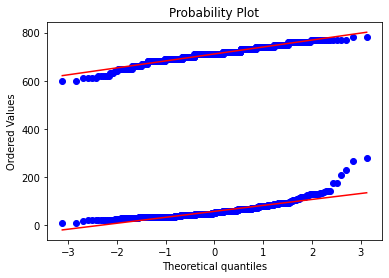

In [70]:
# Checking Whether data is normally distributed
stats.probplot(education.gmat, dist="norm", plot=pylab)

stats.probplot(education.workex, dist="norm", plot=pylab)

((array([-3.12260341, -2.85151707, -2.69984322, -2.59267337, -2.50893963,
         -2.43979696, -2.38066073, -2.32883665, -2.28260202, -2.24078627,
         -2.20255648, -2.16729818, -2.13454461, -2.1039326 , -2.07517382,
         -2.04803542, -2.02232653, -1.99788867, -1.97458879, -1.95231403,
         -1.93096781, -1.91046682, -1.89073868, -1.8717201 , -1.85335538,
         -1.83559526, -1.81839593, -1.80171828, -1.78552721, -1.76979112,
         -1.75448146, -1.73957231, -1.7250401 , -1.71086332, -1.69702228,
         -1.68349892, -1.6702766 , -1.65734002, -1.644675  , -1.63226842,
         -1.62010812, -1.60818277, -1.59648185, -1.5849955 , -1.57371454,
         -1.56263038, -1.55173494, -1.54102065, -1.5304804 , -1.52010749,
         -1.50989561, -1.4998388 , -1.48993143, -1.48016819, -1.47054404,
         -1.4610542 , -1.45169414, -1.44245956, -1.43334639, -1.42435072,
         -1.41546885, -1.40669727, -1.39803261, -1.38947165, -1.38101133,
         -1.37264872, -1.36438101, -1.

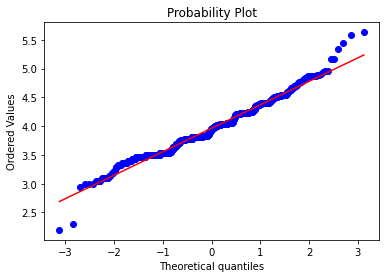

In [71]:
import numpy as np

# Transformation to make workex variable normal
stats.probplot(np.log(education.workex), dist="norm", plot=pylab)

#Standardization/Normalization#

In [72]:
import pandas as pd
import numpy as np

##Standardization##

In [73]:
### Standardization
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("mtcars.csv")
a = data.describe()

In [74]:
# Initialise the Scaler
scaler = StandardScaler()

In [75]:
# To scale data
df = scaler.fit_transform(data)

In [76]:
# Convert the array back to a dataframe
dataset = pd.DataFrame(df)
res = dataset.describe()

##Normalization##

In [77]:
## load data set
ethnic = pd.read_csv("ethnic diversity.csv")
ethnic.columns

Index(['Employee_Name', 'EmpID', 'Position', 'State', 'Zip', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'EmploymentStatus', 'Department',
       'Salaries', 'age', 'Race'],
      dtype='object')

In [78]:
ethnic.drop(['Employee_Name', 'EmpID', 'Zip'], axis = 1, inplace = True)

In [79]:
a1 = ethnic.describe()

In [80]:
# Get dummies
ethnic = pd.get_dummies(ethnic, drop_first = True)

###Normalization Function - Custome Function###

In [81]:
# Range converts to: 0 to 1
def norm_func(i): 
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [82]:
df_norm = norm_func(ethnic)

In [83]:
b = df_norm.describe()